In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Amazon Sale Report.csv", low_memory=False)

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [5]:
df.shape

(128975, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [7]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [8]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [9]:
df.dropna(subset=['Amount'], inplace=True)

In [10]:
df.drop(['index','promotion-ids','fulfilled-by','Unnamed: 22','ship-country','currency'],axis=1, inplace=True)

In [11]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B'],
      dtype='object')

In [12]:
df['Order ID'].isnull().sum()

0

In [13]:
df.duplicated().sum()

3

In [14]:
df.drop_duplicates(subset=df.columns, inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [17]:
df['Sales Channel '].unique()

array(['Amazon.in'], dtype=object)

In [18]:
df['Courier Status'].isnull().sum()

5136

In [19]:
df['ship-city'].isnull().sum()

31

In [20]:
df['ship-state'].isnull().sum()

31

In [21]:
df['ship-postal-code'].isnull().sum()

31

In [22]:
df[df['Qty']==0].shape

(5136, 18)

In [23]:
df.fillna({'ship-city': 'Unknown'}, inplace=True)

In [24]:
df.fillna({'ship-state': 'Unknown'}, inplace=True)

In [25]:
df.fillna({'ship-postal-code': 0}, inplace=True)

In [26]:
df = df[df['Qty'] !=0]

In [27]:
df['Courier Status'].isnull().sum()

0

In [28]:
df['Qty'].unique()

array([1, 2, 3, 5, 4, 8], dtype=int64)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116041 entries, 1 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            116041 non-null  object 
 1   Date                116041 non-null  object 
 2   Status              116041 non-null  object 
 3   Fulfilment          116041 non-null  object 
 4   Sales Channel       116041 non-null  object 
 5   ship-service-level  116041 non-null  object 
 6   Style               116041 non-null  object 
 7   SKU                 116041 non-null  object 
 8   Category            116041 non-null  object 
 9   Size                116041 non-null  object 
 10  ASIN                116041 non-null  object 
 11  Courier Status      116041 non-null  object 
 12  Qty                 116041 non-null  int64  
 13  Amount              116041 non-null  float64
 14  ship-city           116041 non-null  object 
 15  ship-state          116041 non-null  ob

In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df.describe()

,Qty,Amount,ship-postal-code
count,116041.000000,116041.000000,116041.000000
mean,1.003775,649.769228,463208.480684
std,0.072643,282.636211,191216.788795
min,1.000000,0.000000,0.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,606.000000,500032.000000
75%,1.000000,788.000000,600017.000000
max,8.000000,5584.000000,855117.000000


In [32]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,False
1,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,True
2,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,False
3,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,False
4,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,160036.0,False


Outlier Detection

{'whiskers': [<matplotlib.lines.Line2D at 0x25bab732ff0>,
 'caps': [<matplotlib.lines.Line2D at 0x25bab733590>,
 'boxes': [<matplotlib.lines.Line2D at 0x25bab732d80>],
 'medians': [<matplotlib.lines.Line2D at 0x25bab733b60>],
 'fliers': [<matplotlib.lines.Line2D at 0x25bab733e00>],
 'means': []}

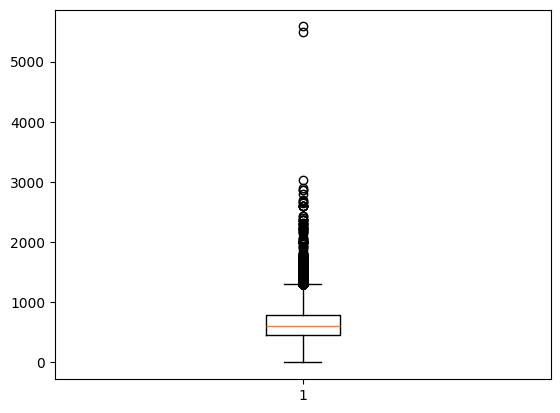

In [33]:
plt.boxplot(x=df['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25ba909c260>,
 'caps': [<matplotlib.lines.Line2D at 0x25ba9028530>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ba909c080>],
 'medians': [<matplotlib.lines.Line2D at 0x25ba909cce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ba909cfb0>],
 'means': []}

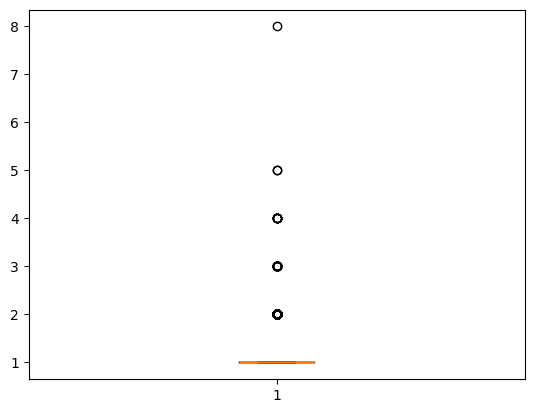

In [34]:
plt.boxplot(x=df['Qty'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25ba90d7ec0>,
 'caps': [<matplotlib.lines.Line2D at 0x25ba93c84a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ba90d7c20>],
 'medians': [<matplotlib.lines.Line2D at 0x25ba93c8a70>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ba93c8ce0>],
 'means': []}

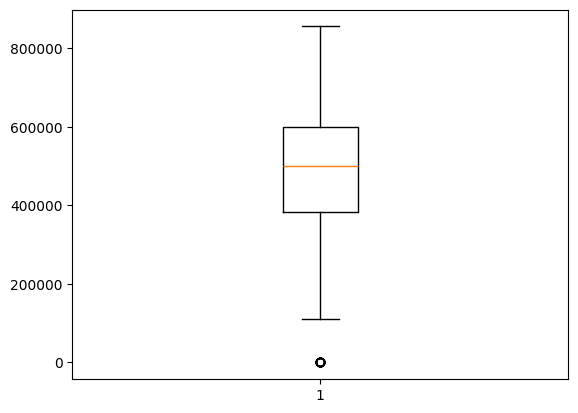

In [35]:
plt.boxplot(x=df['ship-postal-code'])

Outliers reflect the real business sales (bulk orders). Hence not removed

Handling Inconsistencies

In [36]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B'],
      dtype='object')

In [37]:
df.shape

(116041, 18)

In [38]:
df['Category']=df['Category'].str.title()

In [39]:
df['ship-city']=df['ship-city'].str.title()

In [40]:
df['ship-state']=df['ship-state'].str.title()

In [41]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\user\AppData\Local\Temp\ipykernel_4484\3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [42]:
df['Month']=df['Date'].dt.month

In [43]:
df['Category'].unique()

array(['Kurta', 'Top', 'Set', 'Western Dress', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [44]:
df['ship-city'].value_counts()

ship-city
Bengaluru                11004
Hyderabad                 8249
Mumbai                    6565
New Delhi                 5743
Chennai                   5728
                         ...  
Kolkatal                     1
Selsella                     1
Narkatia                     1
Mankapur                     1
Prayagraj (Allahabad)        1
Name: count, Length: 6933, dtype: int64

In [45]:
df['ship-state'].unique()

array(['Karnataka', 'Maharashtra', 'Tamil Nadu', 'Uttar Pradesh',
       'Chandigarh', 'Telangana', 'Andhra Pradesh', 'Rajasthan', 'Delhi',
       'Haryana', 'Assam', 'Jharkhand', 'Chhattisgarh', 'Odisha',
       'Kerala', 'Madhya Pradesh', 'West Bengal', 'Nagaland', 'Gujarat',
       'Uttarakhand', 'Bihar', 'Jammu & Kashmir', 'Punjab',
       'Himachal Pradesh', 'Arunachal Pradesh', 'Manipur', 'Goa',
       'Meghalaya', 'Puducherry', 'Tripura', 'Ladakh', 'Dadra And Nagar',
       'Sikkim', 'Unknown', 'Andaman & Nicobar ', 'Rajshthan', 'Nl',
       'Mizoram', 'New Delhi', 'Punjab/Mohali/Zirakpur', 'Rj', 'Orissa',
       'Lakshadweep', 'Pb', 'Ar', 'Pondicherry', 'Rajsthan'], dtype=object)

In [46]:
df['ship-state']=df['ship-state'].replace({'Apo':'Andhra Pradesh', 'Rj':'Rajasthan', 'Rajsthan':'Rajasthan','Rajshthan':'Rajasthan', 'Nl':'Nagaland',
                                           'Punjab/Mohali/Zirakpur':'Punjab', 'Pb':'Punjab','Orissa':'Odisha','Ar':'Arunachal Pradesh',
                                          'Delhi':'New Delhi','Puducherry':'Pondicherry','Dadra And Nagar':'Dadra and Nagar Haveli'})

In [47]:
df['ship-state'].unique()

array(['Karnataka', 'Maharashtra', 'Tamil Nadu', 'Uttar Pradesh',
       'Chandigarh', 'Telangana', 'Andhra Pradesh', 'Rajasthan',
       'New Delhi', 'Haryana', 'Assam', 'Jharkhand', 'Chhattisgarh',
       'Odisha', 'Kerala', 'Madhya Pradesh', 'West Bengal', 'Nagaland',
       'Gujarat', 'Uttarakhand', 'Bihar', 'Jammu & Kashmir', 'Punjab',
       'Himachal Pradesh', 'Arunachal Pradesh', 'Manipur', 'Goa',
       'Meghalaya', 'Pondicherry', 'Tripura', 'Ladakh',
       'Dadra and Nagar Haveli', 'Sikkim', 'Unknown',
       'Andaman & Nicobar ', 'Mizoram', 'Lakshadweep'], dtype=object)

In [48]:
df['ship-city'].unique()

array(['Bengaluru', 'Navi Mumbai', 'Chennai', ...,
       'Vaishali Nagar Nagpur', 'Gulabpura, Distt Bhilwara',
       'Prayagraj (Allahabad)'], dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116041 entries, 0 to 116040
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            116041 non-null  object        
 1   Date                116041 non-null  datetime64[ns]
 2   Status              116041 non-null  object        
 3   Fulfilment          116041 non-null  object        
 4   Sales Channel       116041 non-null  object        
 5   ship-service-level  116041 non-null  object        
 6   Style               116041 non-null  object        
 7   SKU                 116041 non-null  object        
 8   Category            116041 non-null  object        
 9   Size                116041 non-null  object        
 10  ASIN                116041 non-null  object        
 11  Courier Status      116041 non-null  object        
 12  Qty                 116041 non-null  int64         
 13  Amount              116041 no

Data Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['B2B']=encoder.fit_transform(df['B2B'])

False=0 and True=1 in B2B column

In [51]:
df['Courier Status'].unique()

array(['Shipped', 'Unshipped'], dtype=object)

In [52]:
df['Status'].unique()

array(['Shipped - Delivered to Buyer', 'Shipped', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged'], dtype=object)

In [53]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116041 entries, 0 to 116040
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            116041 non-null  object        
 1   Date                116041 non-null  datetime64[ns]
 2   Status              116041 non-null  object        
 3   Fulfilment          116041 non-null  object        
 4   Sales Channel       116041 non-null  object        
 5   ship-service-level  116041 non-null  object        
 6   Style               116041 non-null  object        
 7   SKU                 116041 non-null  object        
 8   Category            116041 non-null  object        
 9   Size                116041 non-null  object        
 10  ASIN                116041 non-null  object        
 11  Courier Status      116041 non-null  object        
 12  Qty                 116041 non-null  int64         
 13  Amount              116041 no

In [55]:
df.shape

(116041, 19)

In [56]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B', 'Month'],
      dtype='object')

In [100]:
df.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,Month
0,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,3XL,B09K3WFS32,Shipped,1,406.0,Bengaluru,Karnataka,560085.0,0,4
1,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,Kurta,XL,B07WV4JV4D,Shipped,1,329.0,Navi Mumbai,Maharashtra,410210.0,1,4
2,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,Chennai,Tamil Nadu,600073.0,0,4
3,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,824.0,Ghaziabad,Uttar Pradesh,201102.0,0,4
4,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,653.0,Chandigarh,Chandigarh,160036.0,0,4


In [101]:
df.to_excel('output.xlsx',index=False)

EDA

Customer Repeat Rate

In [57]:
order=df['Order ID'].value_counts()
Order=pd.DataFrame(order)
(len(Order[Order['count']>=2])/len(df))*100

5.329150903559949

In [58]:
df['Status'].value_counts()

Status
Shipped                          77593
Shipped - Delivered to Buyer     28761
Cancelled                         5630
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

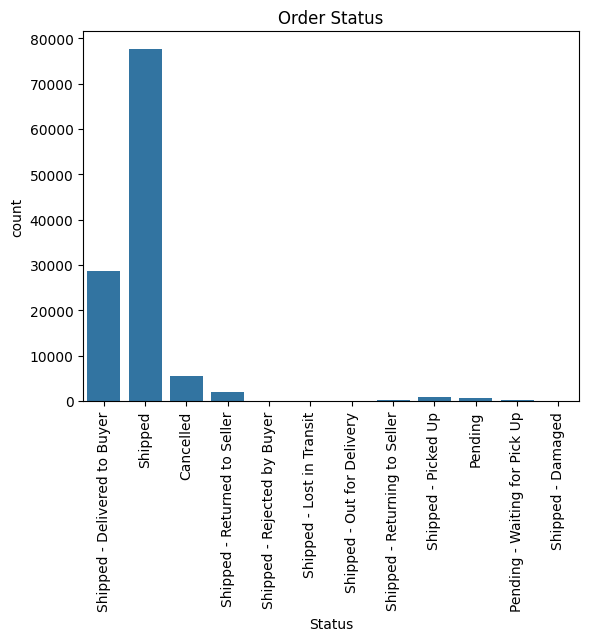

In [59]:
sns.countplot(x=df['Status'])
plt.xticks(rotation=90)
plt.title("Order Status")
plt.show()

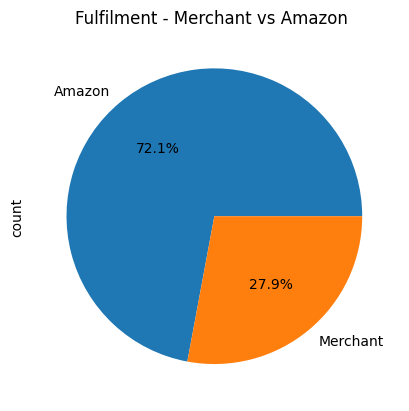

In [60]:
df['Fulfilment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Fulfilment - Merchant vs Amazon ")
plt.show()

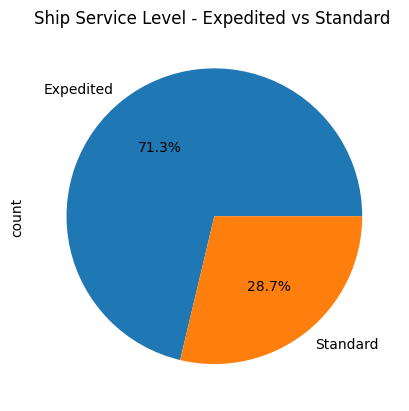

In [61]:
df['ship-service-level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Ship Service Level - Expedited vs Standard ")
plt.show()

In [62]:
Category=df['Category'].value_counts()
Category

Category
Set              45088
Kurta            44762
Western Dress    13894
Top               9866
Ethnic Dress      1050
Blouse             837
Bottom             393
Saree              148
Dupatta              3
Name: count, dtype: int64

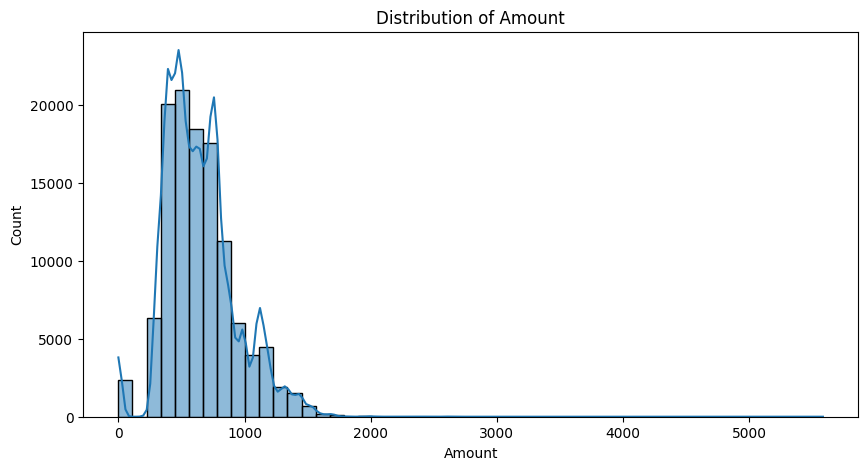

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')
plt.show()

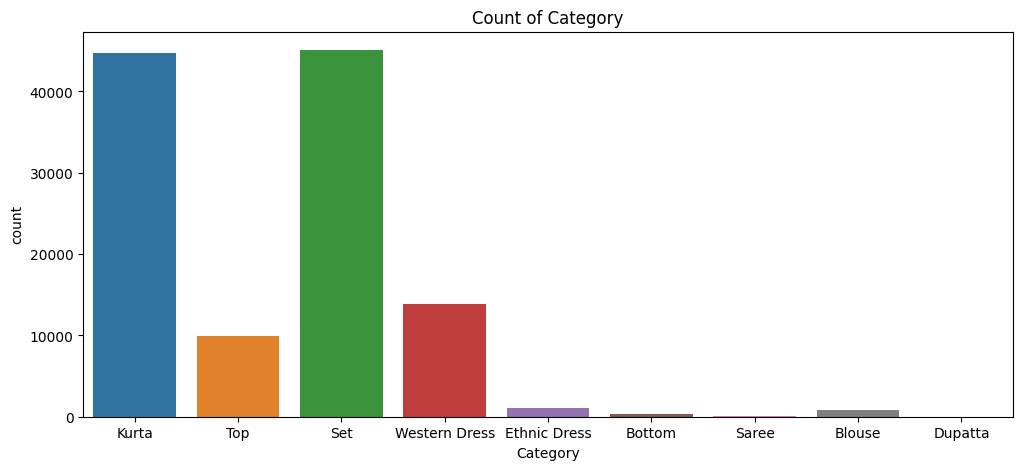

In [64]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Category'], hue=df['Category'])
plt.title('Count of Category')
plt.show()

In [65]:
Size=df['Size'].value_counts().head(10)
Size

Size
M      20343
L      19904
XL     18838
XXL    16417
S      15260
3XL    13461
XS      9888
6XL      686
5XL      511
4XL      396
Name: count, dtype: int64

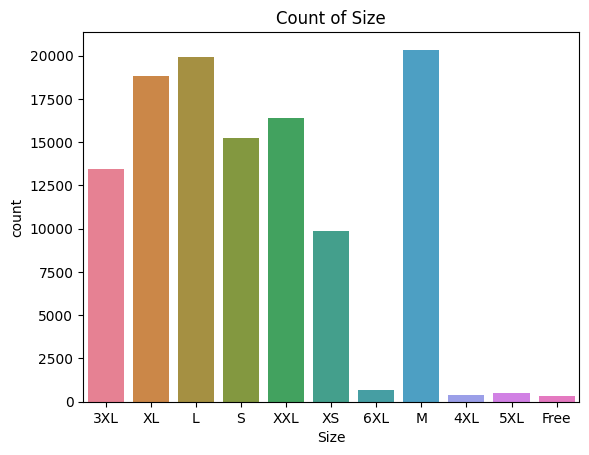

In [66]:
sns.countplot(x=df['Size'], hue=df['Size'])
plt.title("Count of Size")
plt.show()

In [67]:
(len(df[df['B2B']==1])/len(df))*100

0.7109556105169725

In [68]:
df['Month'].value_counts()

Month
4    43940
5    37823
6    34122
3      156
Name: count, dtype: int64

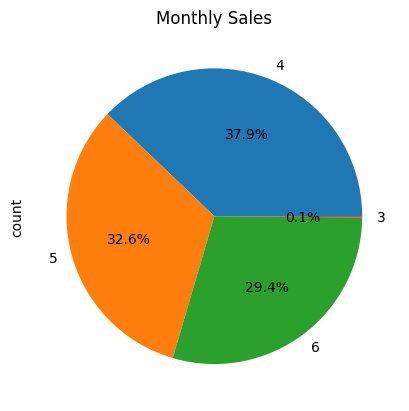

In [102]:
df['Month'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Monthly Sales')
plt.show()

1. Maximum orders are placed in the month of April.
2. Only about 0.7% sales are B2B, remaining are B2C.
3. Distribution of the amount is skewed. Many transactions are under 1000.
4. Most of the orders are placed in the category of Kurta and Set.
5. Most of the orders are fulfilled by Amazon with customer repeat rate of 5%

In [70]:
ct=pd.crosstab(df['Fulfilment'], df['ship-service-level'])
ct

ship-service-level,Expedited,Standard
Fulfilment,,
Amazon,82720,916
Merchant,0,32405


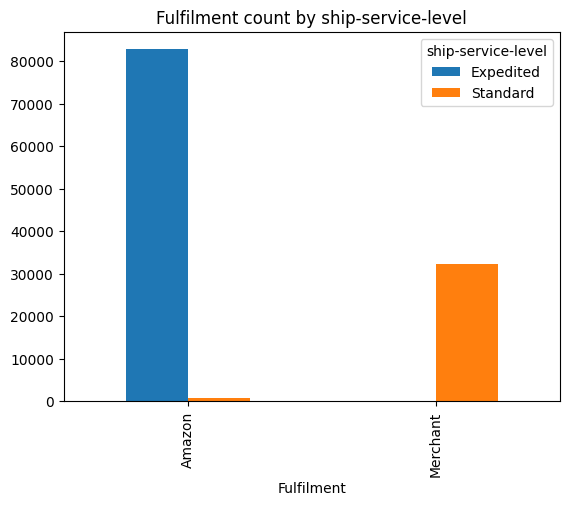

In [71]:
ct.plot(kind='bar', width=0.5)
plt.title("Fulfilment count by ship-service-level")
plt.show()

In [72]:
crtb=pd.crosstab(df['Fulfilment'], df['Courier Status'])
crtb

Courier Status,Shipped,Unshipped
Fulfilment,,
Amazon,77603,6033
Merchant,31881,524


In [73]:
crosstb=pd.crosstab(df['ship-service-level'], df['Courier Status'])
crosstb

Courier Status,Shipped,Unshipped
ship-service-level,,
Expedited,76693,6027
Standard,32791,530


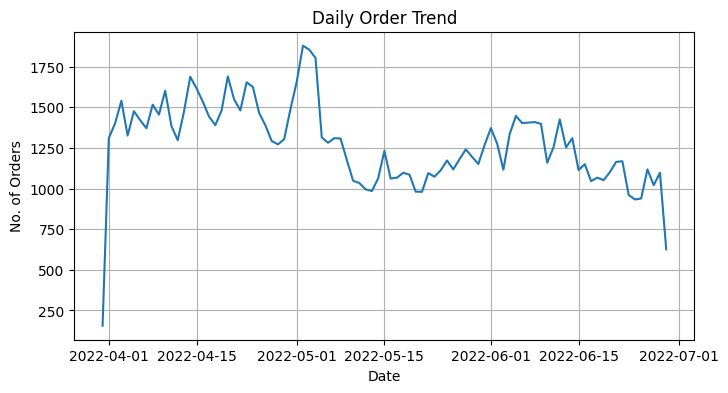

In [104]:
order=df.groupby('Date')['Order ID'].count()
Order=pd.DataFrame(order)
plt.figure(figsize=(8,4))
plt.plot(Order.index, Order.values)
plt.xlabel('Date')
plt.ylabel('No. of Orders')
plt.title('Daily Order Trend')
plt.grid(True)
plt.show()

In [75]:
crosstab=pd.crosstab(df['Size'], df['Category'])
crosstab

Category,Blouse,Bottom,Dupatta,Ethnic Dress,Kurta,Saree,Set,Top,Western Dress
Size,,,,,,,,,
3XL,0,60,0,159,5115,0,5258,1115,1754
4XL,0,0,0,0,350,0,46,0,0
5XL,0,0,0,0,454,0,57,0,0
6XL,0,0,0,0,614,0,72,0,0
Free,186,0,3,0,0,148,0,0,0
L,128,65,0,169,7988,0,7372,1642,2540
M,138,50,0,167,7659,0,8328,1686,2315
S,128,66,0,163,5124,0,6681,1145,1953
XL,115,64,0,173,7799,0,6839,1729,2119


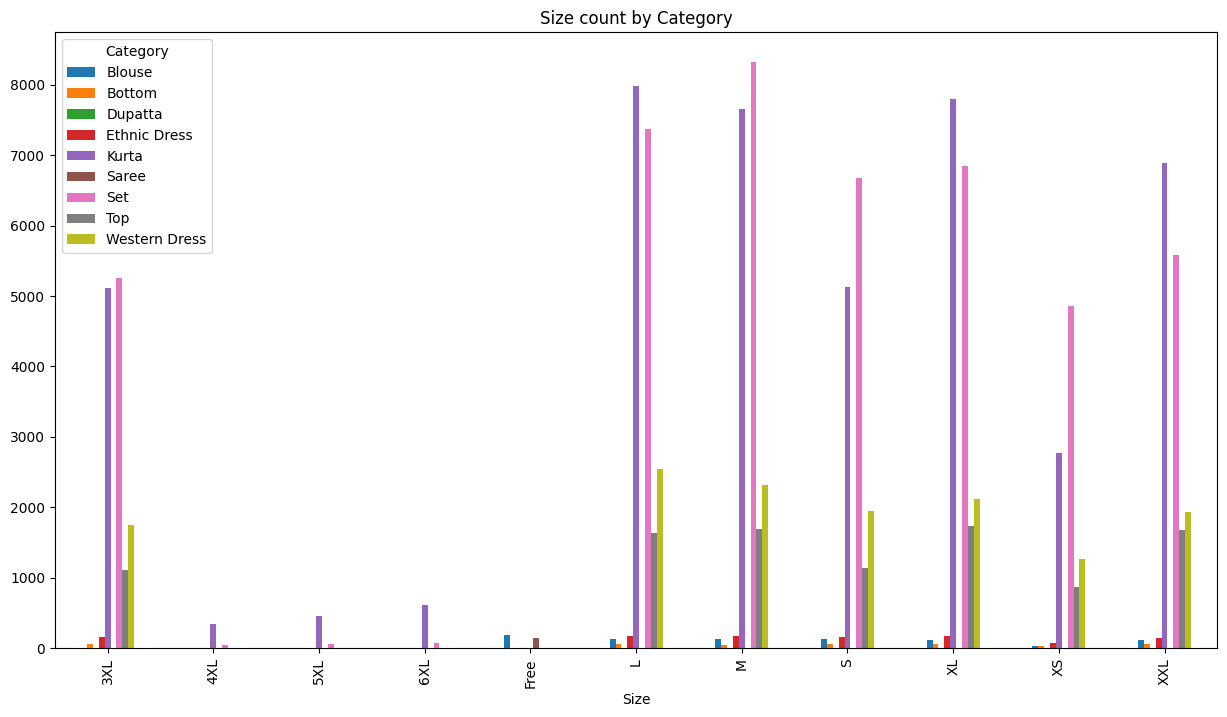

In [76]:
crosstab.plot(kind='bar', width=0.5, figsize=(15,8))
plt.title('Size count by Category')
plt.show()

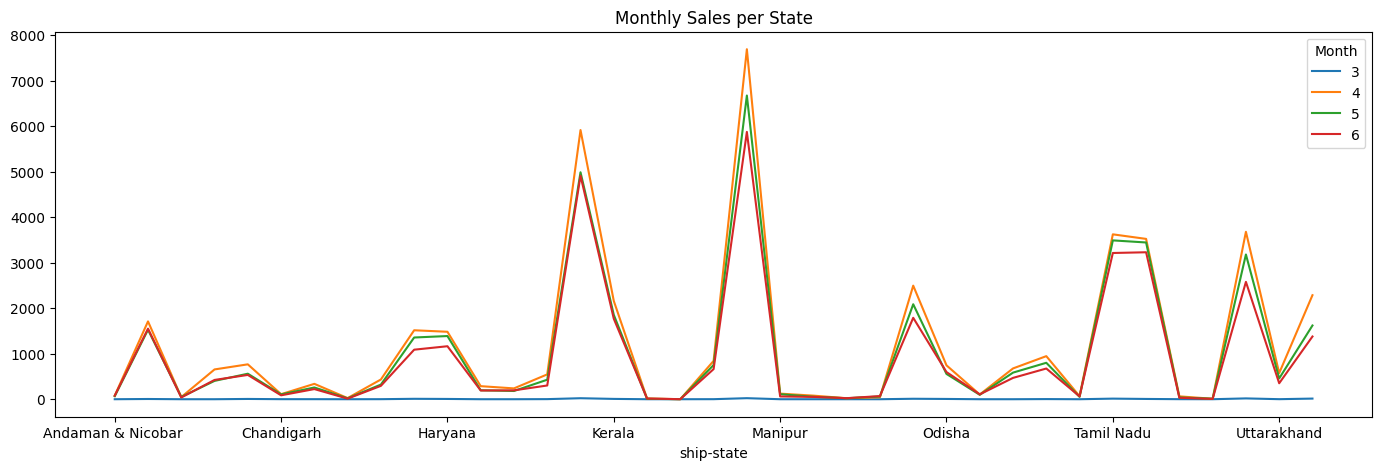

In [77]:
crs=pd.crosstab(df['ship-state'],df['Month'])
crs.plot(kind='line', figsize=(17,5))
plt.title('Monthly Sales per State')
plt.show()

In [78]:
correlation=df[['Qty','Amount']].corr()
correlation

,Qty,Amount
Qty,1.000000,0.145773
Amount,0.145773,1.000000


In [79]:
Month=df.groupby(['Month'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
Month

,Month,Amount
1,4,27581851.0
2,5,25118009.0
3,6,22601750.0
0,3,98261.0


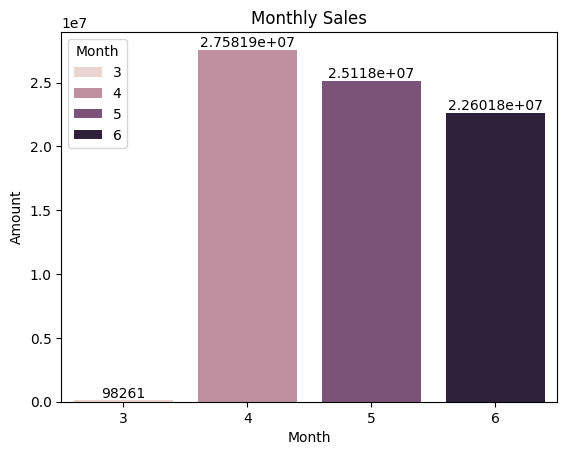

In [80]:
ai=sns.barplot(data=Month, x='Month', y='Amount',hue='Month')
for bars in ai.containers:
    ai.bar_label(bars)
plt.title('Monthly Sales')
plt.show()

In [81]:
category=df.groupby(['Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

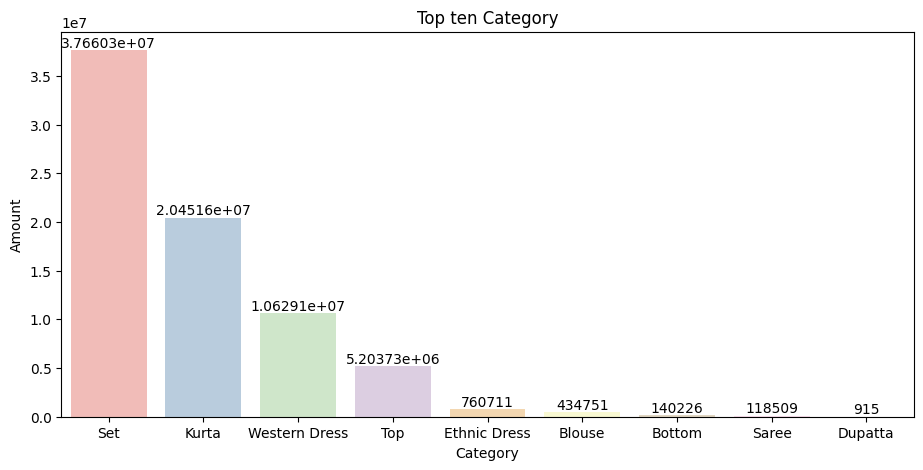

In [107]:
plt.figure(figsize=(11,5))
am=sns.barplot(data=category, x='Category', y='Amount', hue='Category', palette='Pastel1')
for bars in am.containers:
    am.bar_label(bars)
plt.title('Top ten Category')
plt.show()

In [109]:
state=df.groupby(['ship-state'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

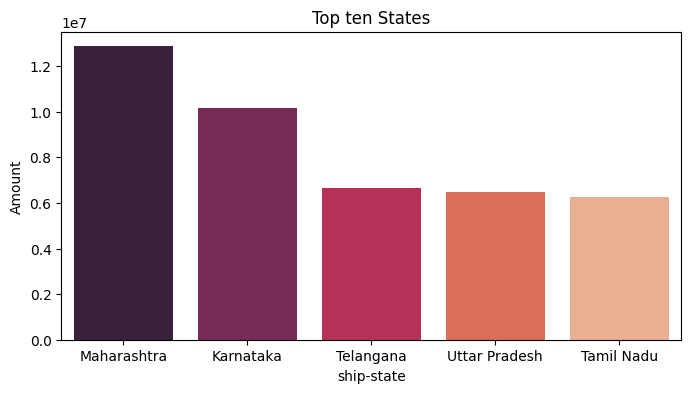

In [112]:
plt.figure(figsize=(8,4))
sns.barplot(data=state, x='ship-state', y='Amount', hue='ship-state', palette='rocket')
plt.title('Top ten States')
plt.show()

In [113]:
State=df.groupby(['ship-state'],as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False).head(6)

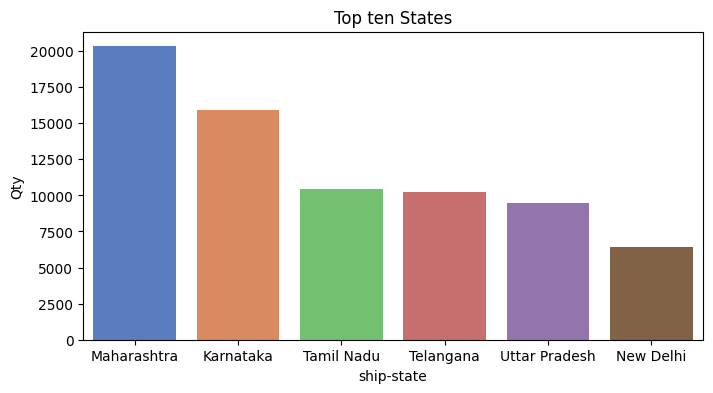

In [116]:
plt.figure(figsize=(8,4))
sns.barplot(data=State, x='ship-state', y='Qty', hue='ship-state', palette='muted')
plt.title('Top ten States')
plt.show()

In [87]:
SKU=df.groupby(['SKU'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False).head(5)
SKU

,SKU,Qty
4501,JNE3797-KR-L,661
4502,JNE3797-KR-M,561
4503,JNE3797-KR-S,503
2708,JNE3405-KR-L,480
1323,J0230-SKD-M,467


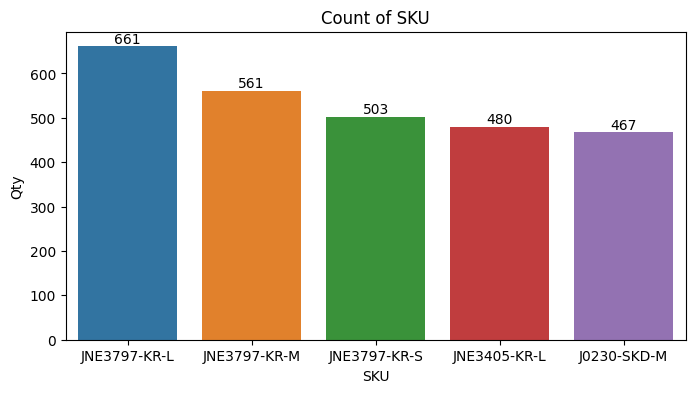

In [118]:
plt.figure(figsize=(8,4))
an=sns.barplot(data=SKU,x='SKU', y='Qty',hue='SKU')
for bars in an.containers:
    an.bar_label(bars)
plt.title('Count of SKU')
plt.show()

In [89]:
sku=df.groupby(['SKU'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

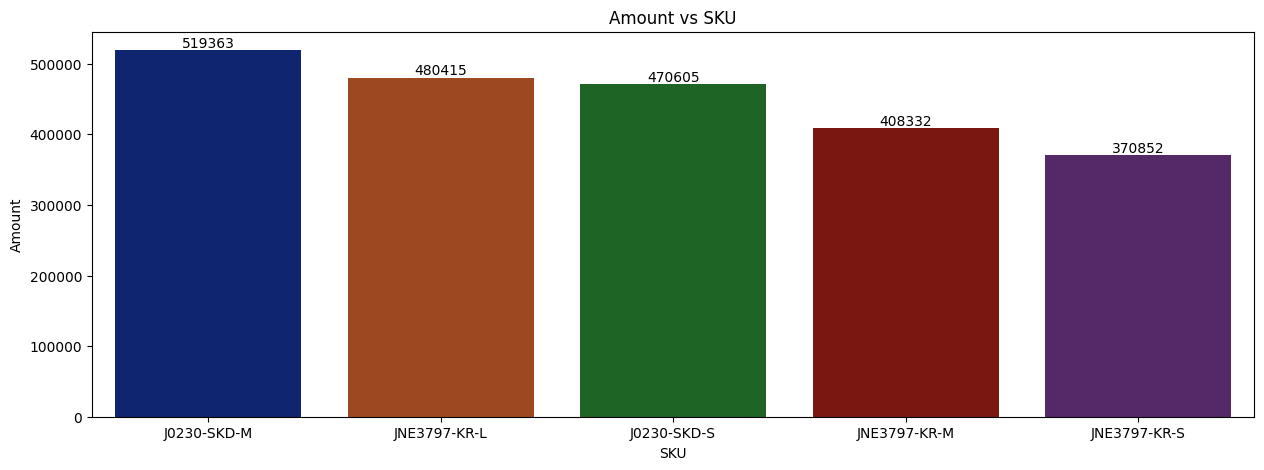

In [90]:
plt.figure(figsize=(15,5))
al=sns.barplot(data=sku ,x='SKU', y='Amount',hue='SKU', palette='dark')
for bars in al.containers:
    al.bar_label(bars)
plt.title('Amount vs SKU')
plt.show()

In [91]:
df[df['Amount']==0].shape

(2343, 19)

In [92]:
(len(df[df['Amount']==0])/len(df))*100

2.019113933868202

1. A significant number of customers prefer expedited shipping for their orders fulfilled by Amazon.
2. Maximum orders are placed in the end of April and 1st week of May.
3. About 27.5 million sales in the month of April followed by 25.1 million in May and 22.6 million in June. Only Rs. 98,261 sales in March.
4. Highest revenue is generated from purchases in the set followed by kurta.
5. Top 5 cities with highest spending are Maharashtra, Karnataka, Telangana, Uttar Pradesh and Tamil Nadu.
6. The highest quantity of purchase is recorder in Maharashtra, Karnataka, Tamil Nadu, Telangana and Uttar Pradesh.
7. Top 3 SKUs are JNE3797-KR-L, JNE3797-KR-M, JNE3797-KR-S.
8. About 2% of Transaction have a amount of zero (Promotional giveaways, coupon codes). 

In [93]:
corr_matrix=df[['Qty','Amount','B2B','Month']].corr()

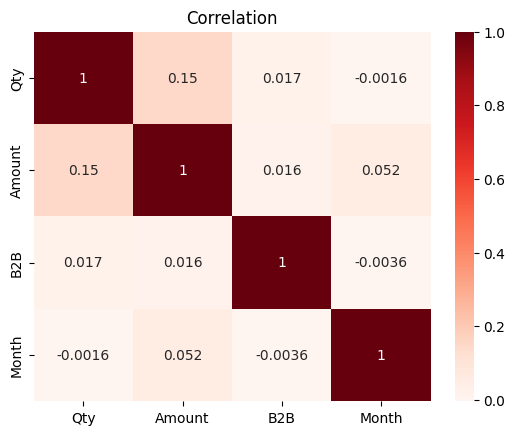

In [94]:
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation')
plt.show()

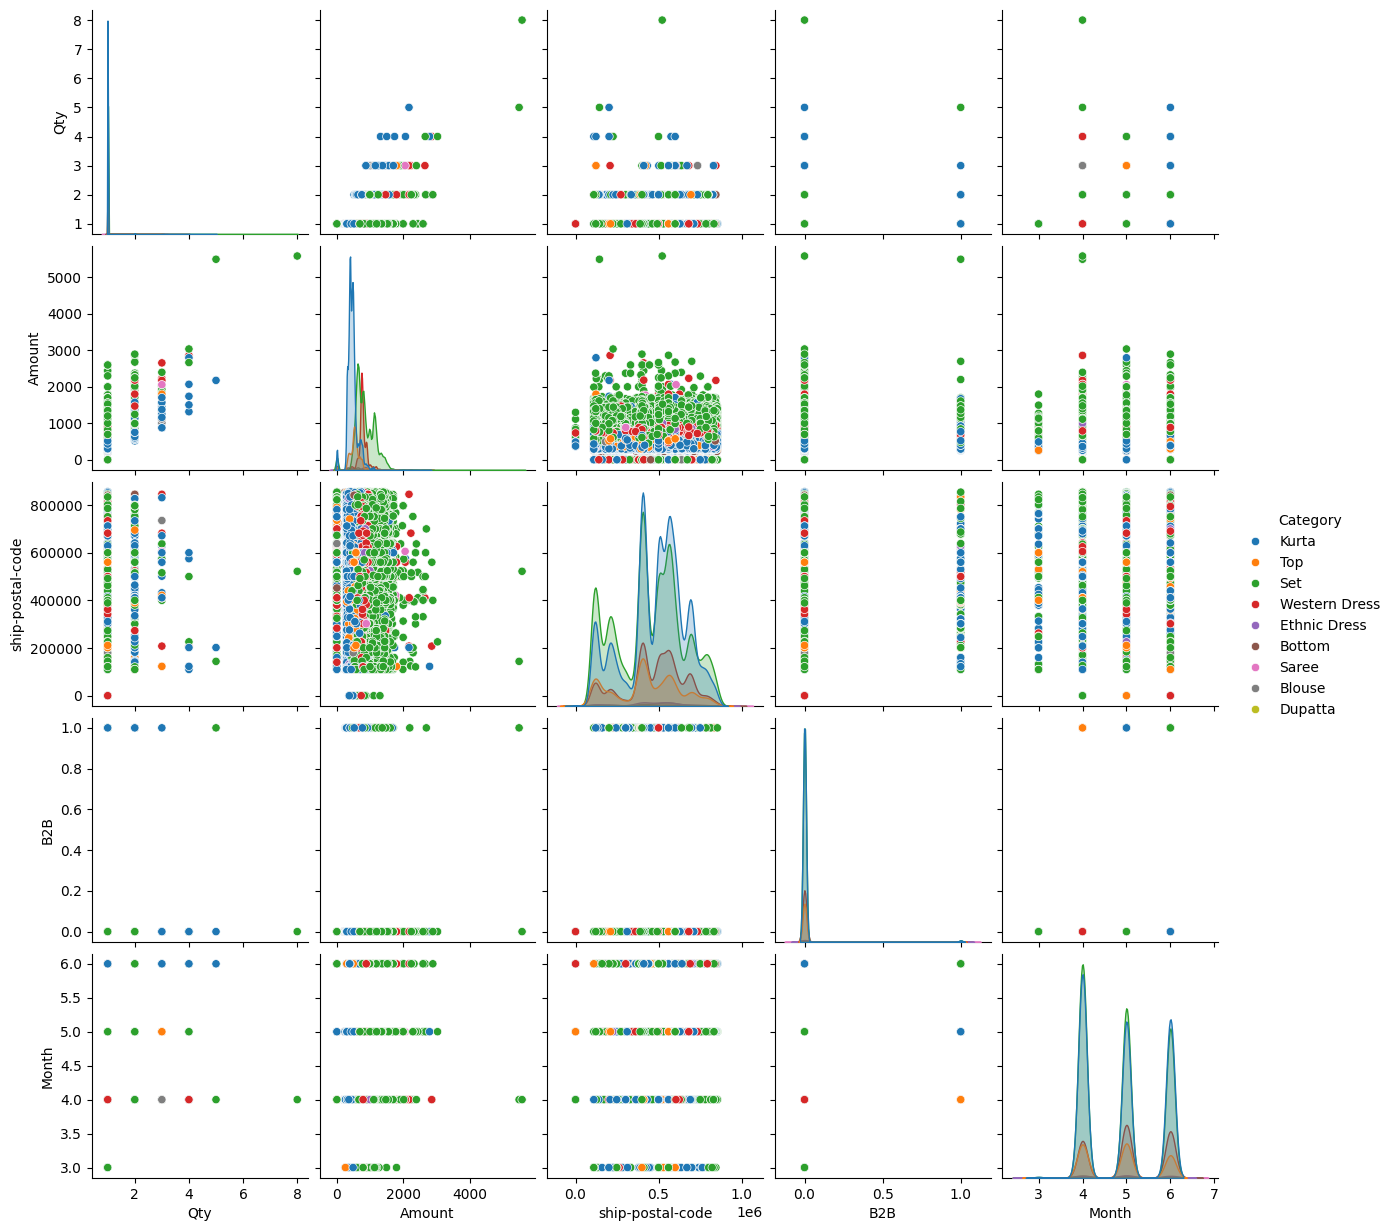

In [95]:
sns.pairplot(df, hue = 'Category')
plt.show()